In [ ]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


^C


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

In [33]:
day = -2 
market_data = pd.read_csv(f"Data/prices_round_1_day_{day}.csv",sep=";",header =0)
trade_history = pd.read_csv(f"Data/trades_round_1_day_{day}.csv",sep=";",header =0)
last_year_market_data = pd.read_csv(f"2024Data/prices_round_1_day_{day}.csv",sep=";",header = 0)
last_year_market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2,999700,AMETHYSTS,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
19996,-2,999800,STARFRUIT,5041,1,5040.0,25.0,NaN,NaN,5045,3,5047.0,26.0,NaN,NaN,5043.0,0.0
19997,-2,999800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,9998,1,10002.0,9.0,10004.0,1.0,9997.0,0.0
19998,-2,999900,STARFRUIT,5044,4,5040.0,32.0,NaN,NaN,5047,32,NaN,NaN,NaN,NaN,5045.5,0.0


In [ ]:
market_data
last_year_market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-2,999800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,9998,1,10002.0,9.0,10004.0,1.0,9997.0,0.0
29996,-2,999800,KELP,2026,26,NaN,NaN,NaN,NaN,2028,3,2030.0,26.0,NaN,NaN,2027.0,0.0
29997,-2,999900,RAINFOREST_RESIN,9996,2,9995.0,30.0,NaN,NaN,10004,2,10005.0,30.0,NaN,NaN,10000.0,0.0
29998,-2,999900,KELP,2027,4,2026.0,32.0,NaN,NaN,2029,32,NaN,NaN,NaN,NaN,2028.0,0.0


In [37]:
kelp_data = market_data[market_data['product'] == "KELP"].reset_index(drop=True)
squid_ink_data = market_data[market_data['product'] == "SQUID_INK"].reset_index(drop=True)
starfruit_data = last_year_market_data[last_year_market_data['product'] == "STARFRUIT"].reset_index(drop=True)

In [42]:
squid_ink_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
1,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0
3,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0
4,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,2003,26,NaN,NaN,NaN,NaN,2001.5,0.0
9996,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,2004,30,NaN,NaN,NaN,NaN,2002.5,0.0
9997,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,2005,22,NaN,NaN,NaN,NaN,2003.0,0.0
9998,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,2004,3,2005.0,26.0,NaN,NaN,2003.0,0.0


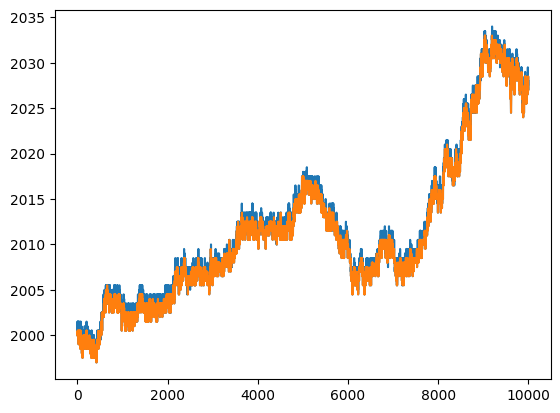

In [38]:
kelp_data_filtered = kelp_data[(kelp_data['bid_volume_1'] > 20)]
kelp_data_filtered
plt.plot(kelp_data['mid_price'])
plt.plot(kelp_data_filtered['mid_price'])


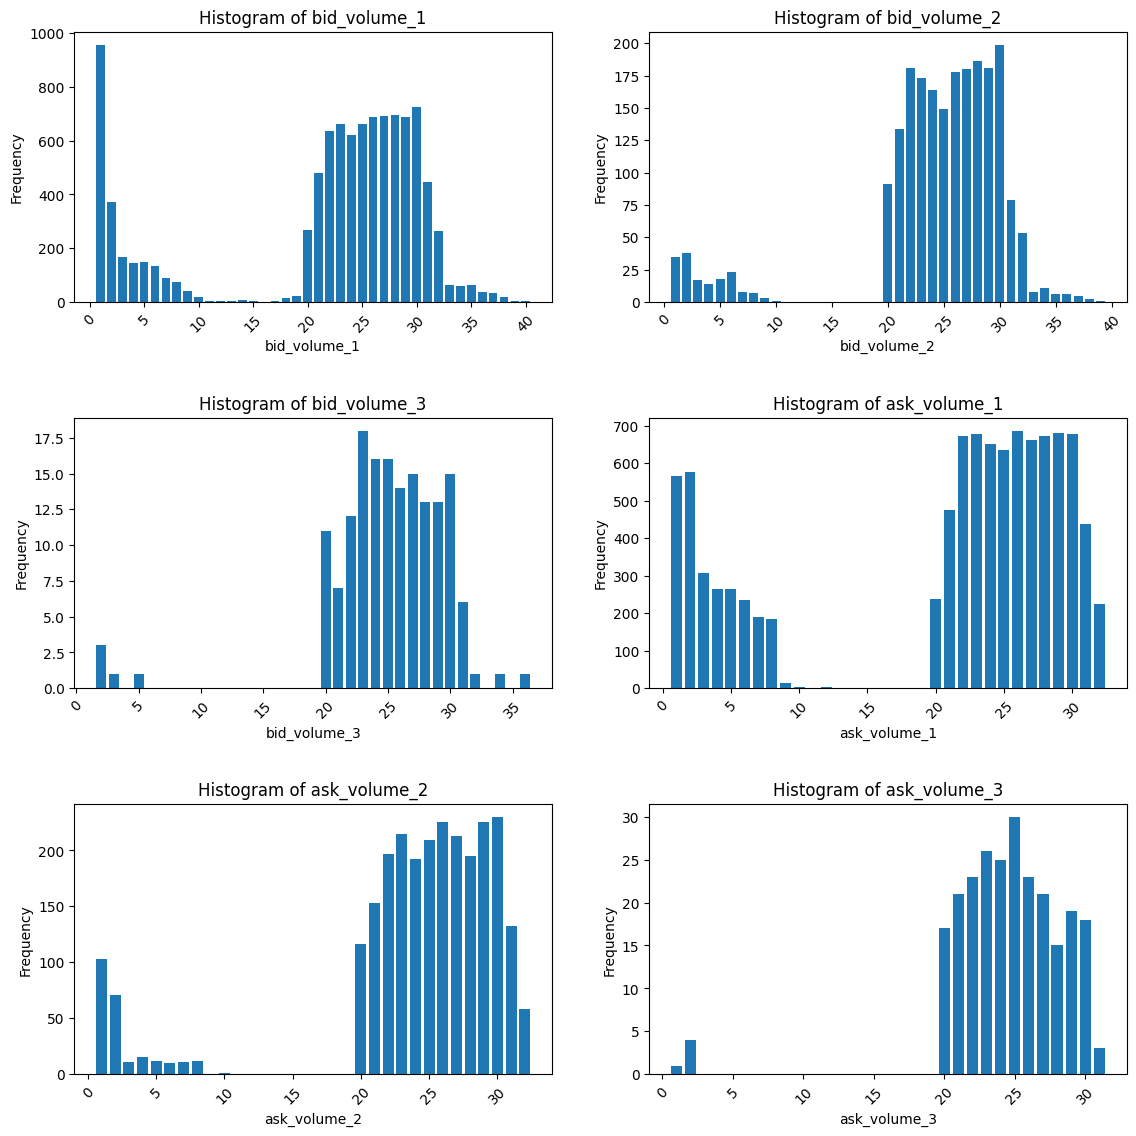

In [39]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = kelp_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

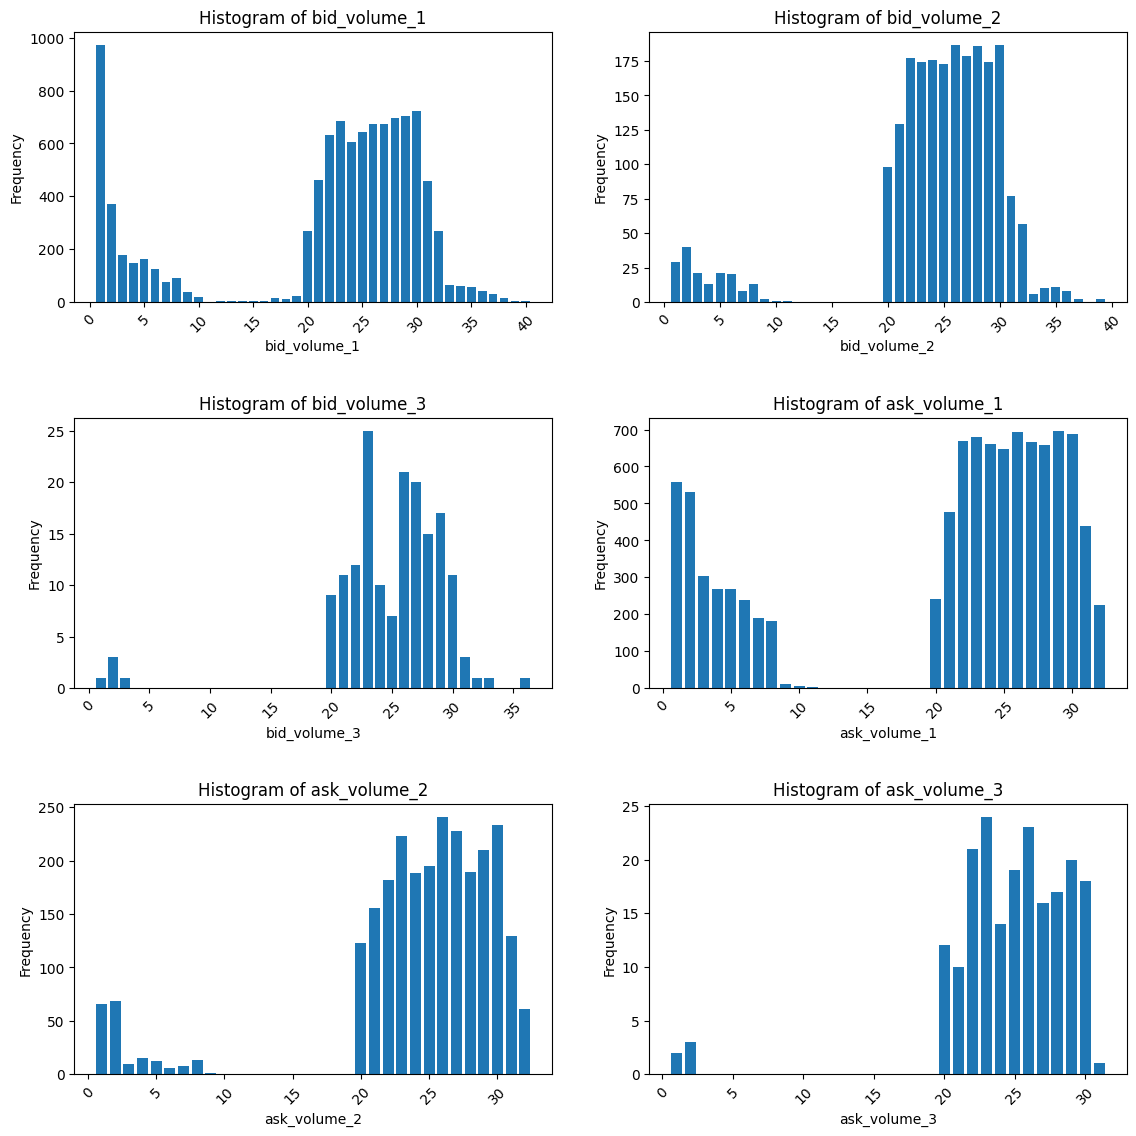

In [40]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = squid_ink_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [48]:
large_squid_bids = squid_ink_data[squid_ink_data['bid_volume_1'] >33] 
large_squid_bids


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,obi_level_1
182,-2,18200,SQUID_INK,1994,37,NaN,NaN,NaN,NaN,1997,29,NaN,NaN,NaN,NaN,1995.5,0.0,0.121212
227,-2,22700,SQUID_INK,1994,35,NaN,NaN,NaN,NaN,1997,27,NaN,NaN,NaN,NaN,1995.5,0.0,0.129032
287,-2,28700,SQUID_INK,1993,34,NaN,NaN,NaN,NaN,1996,32,NaN,NaN,NaN,NaN,1994.5,0.0,0.030303
331,-2,33100,SQUID_INK,1991,35,NaN,NaN,NaN,NaN,1994,27,NaN,NaN,NaN,NaN,1992.5,0.0,0.129032
347,-2,34700,SQUID_INK,1992,34,NaN,NaN,NaN,NaN,1995,31,NaN,NaN,NaN,NaN,1993.5,0.0,0.046154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,-2,983300,SQUID_INK,2001,34,NaN,NaN,NaN,NaN,2004,29,NaN,NaN,NaN,NaN,2002.5,0.0,0.079365
9861,-2,986100,SQUID_INK,2000,35,NaN,NaN,NaN,NaN,2003,28,NaN,NaN,NaN,NaN,2001.5,0.0,0.111111
9896,-2,989600,SQUID_INK,2005,39,NaN,NaN,NaN,NaN,2008,31,NaN,NaN,NaN,NaN,2006.5,0.0,0.114286
9905,-2,990500,SQUID_INK,2005,36,NaN,NaN,NaN,NaN,2008,31,NaN,NaN,NaN,NaN,2006.5,0.0,0.074627


In [ ]:
large_kelp_bids = kelp_data[kelp_data['bid_volume_1'] >33] 
large_kelp_bids_time_stamps = large_kelp_bids


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,obi_level_1
182,-2,18200,KELP,1998,37,NaN,NaN,NaN,NaN,2001,29,NaN,NaN,NaN,NaN,1999.5,0.0,0.121212
227,-2,22700,KELP,1998,35,NaN,NaN,NaN,NaN,2001,27,NaN,NaN,NaN,NaN,1999.5,0.0,0.129032
331,-2,33100,KELP,1997,35,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,0.129032
347,-2,34700,KELP,1997,34,NaN,NaN,NaN,NaN,2000,31,NaN,NaN,NaN,NaN,1998.5,0.0,0.046154
404,-2,40400,KELP,1997,37,NaN,NaN,NaN,NaN,2000,30,NaN,NaN,NaN,NaN,1998.5,0.0,0.104478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,-2,983900,KELP,2027,35,NaN,NaN,NaN,NaN,2028,2,2030.0,27.0,NaN,NaN,2027.5,0.0,0.891892
9861,-2,986100,KELP,2026,35,NaN,NaN,NaN,NaN,2029,28,NaN,NaN,NaN,NaN,2027.5,0.0,0.111111
9896,-2,989600,KELP,2023,39,NaN,NaN,NaN,NaN,2026,31,NaN,NaN,NaN,NaN,2024.5,0.0,0.114286
9954,-2,995400,KELP,2025,36,NaN,NaN,NaN,NaN,2028,28,NaN,NaN,NaN,NaN,2026.5,0.0,0.125000


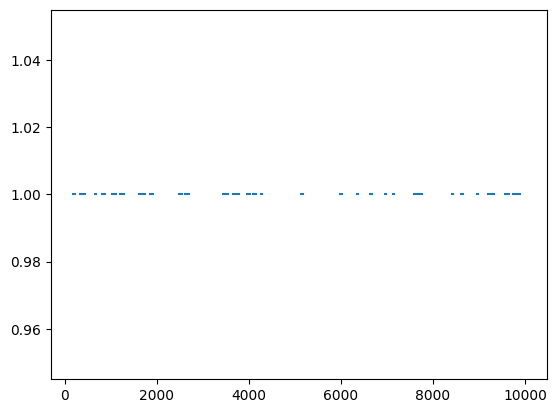

In [ ]:
plt.plot(large_kelp_bids['timestamp']/large_squid_bids['timestamp'])

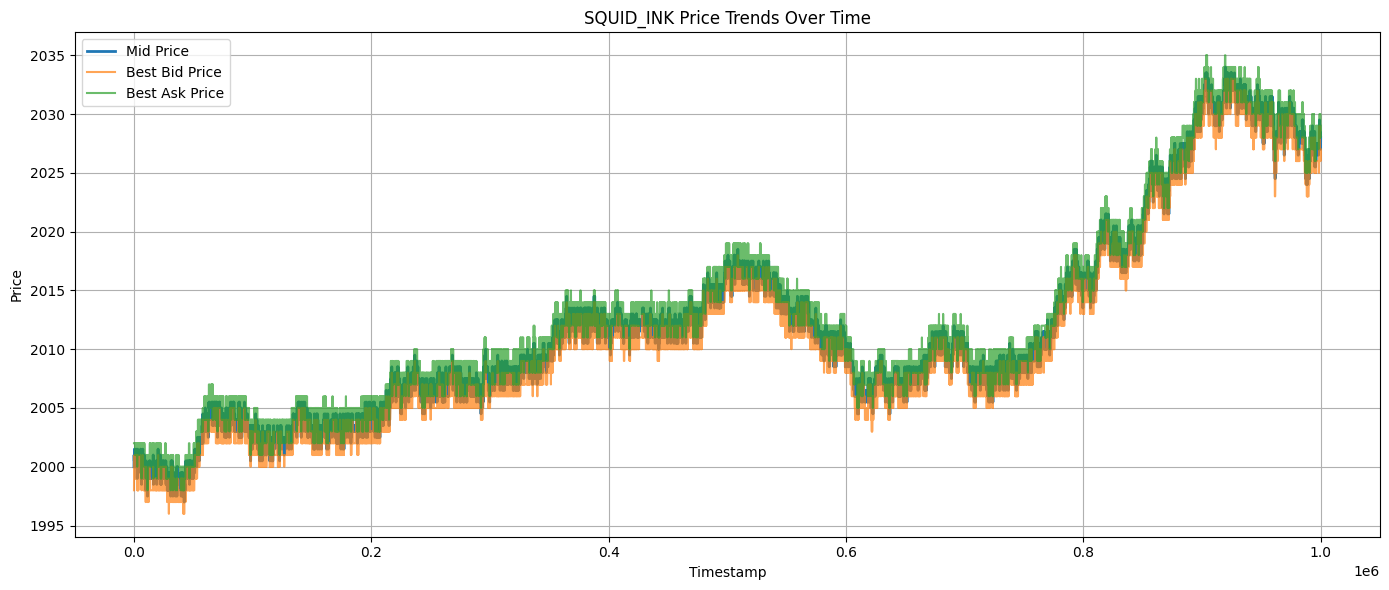

In [47]:
import matplotlib.pyplot as plt

# Sort by timestamp for time series analysis
squid_ink_df = kelp_data

# Calculate order book imbalance (OBI) at level 1: (bid_vol - ask_vol) / (bid_vol + ask_vol)
squid_ink_df['obi_level_1'] = (
    squid_ink_df['bid_volume_1'] - squid_ink_df['ask_volume_1']
) / (
    squid_ink_df['bid_volume_1'] + squid_ink_df['ask_volume_1']
)

# Plot mid_price, bid_price_1, ask_price_1 over time
plt.figure(figsize=(14, 6))
plt.plot(squid_ink_df['timestamp'], squid_ink_df['mid_price'], label='Mid Price', linewidth=2)
plt.plot(squid_ink_df['timestamp'], squid_ink_df['bid_price_1'], label='Best Bid Price', alpha=0.7)
plt.plot(squid_ink_df['timestamp'], squid_ink_df['ask_price_1'], label='Best Ask Price', alpha=0.7)
plt.title("SQUID_INK Price Trends Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


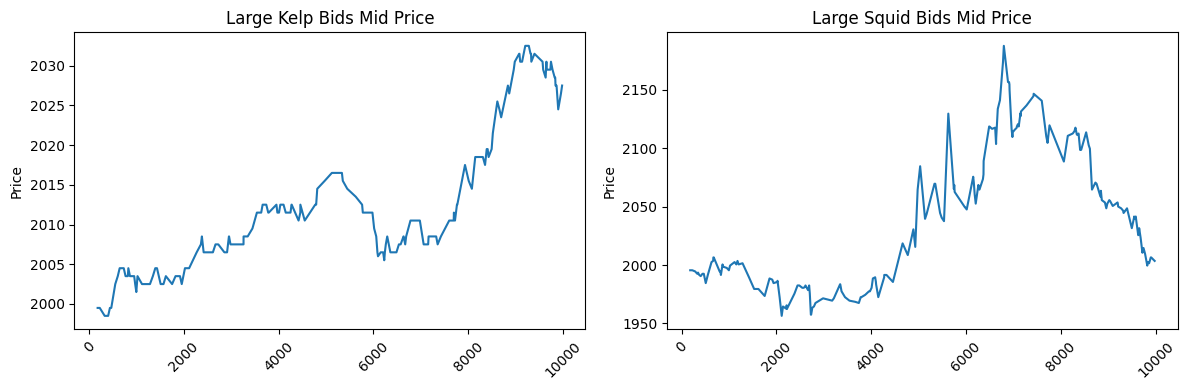

In [54]:
num_plots = 2
num_rows = (num_plots + 1) // 2  # This correctly calculates 1
num_cols = 2                     # You want 2 columns

plt.figure(figsize=(12, 4 * num_rows)) # Figure size: (12, 4)

# --- First subplot ---
# Grid is num_rows x num_cols (1x2), this is plot index 1
plt.subplot(num_rows, num_cols, 1)
plt.plot(large_kelp_bids.index, large_kelp_bids['mid_price']) # Good practice to plot index vs value
plt.title('Large Kelp Bids Mid Price')
plt.ylabel('Price')
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap

# --- Second subplot ---
# Grid is num_rows x num_cols (1x2), this is plot index 2
plt.subplot(num_rows, num_cols, 2)
plt.plot(large_squid_bids.index, large_squid_bids['mid_price']) # Good practice to plot index vs value
plt.title('Large Squid Bids Mid Price')
plt.ylabel('Price')
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap

# --- Adjust layout and show ---
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

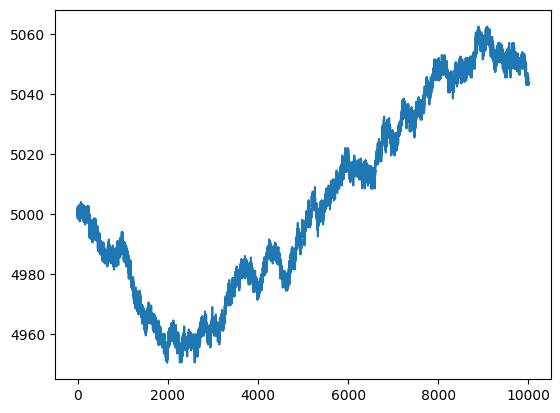

In [58]:
plt.plot(starfruit_data['mid_price'])